# Imports

In [ ]:
import os
import io
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

pathname = "/content/drive/My Drive/STAT 223/"
os.chdir(pathname)

Mounted at /content/drive/


In [ ]:
!pwd

/content/drive/My Drive/STAT 223


In [ ]:
data = pd.read_csv("/content/drive/My Drive/STAT 223/MLBTeams.csv")

In [ ]:
data.head()

,yearID,franchID,lgID,divID,Division,Year,DivWin,WinPct,OppWinPct,LastYearWin,...,SLG,OPS,SO,ERA,HRA,wOBA,wRC,WAR,Payroll,PayrollStd
0,1995,ANA,AL,W,AL West,1,0,0.537931,0.508083,0,...,0.448,0.800,889,4.52,163,0.351,106,22.7,34702577,0.140872
1,1996,ANA,AL,W,AL West,2,0,0.434783,0.520576,0,...,0.431,0.770,974,5.30,219,0.337,94,13.9,25140142,-0.681146
2,1997,ANA,AL,W,AL West,3,0,0.518519,0.477366,0,...,0.416,0.762,953,4.52,202,0.336,100,21.6,46684364,0.461344
3,1998,ANA,AL,W,AL West,4,0,0.524691,0.490722,0,...,0.415,0.751,1028,4.49,164,0.330,94,8.2,48389000,0.417323
4,1999,ANA,AL,W,AL West,5,0,0.432099,0.537037,0,...,0.395,0.716,1022,4.79,177,0.316,80,9.8,49868167,0.077941


# MADfun

Now write the function “MADfun” that will calculate the mean absolute difference you wrote in R in
Python. The syntax for defining a function in Python that takes in a vector argument “vec” and
returns a value “mad” is:

In [ ]:
def MADfun(vec):
  if(len(vec)==0):
    return "Input should not be empty. Please try again!"
  elif (np.issubdtype(vec.dtype, np.number) == False):
    return "Input should be numbers. Please try again!"
  else:
    absdiff = np.sum(np.abs(vec[:, None] - vec))
    return absdiff / (len(vec) * (len(vec) - 1))

In [ ]:
vec = np.array([1,2,3,4,5,6,7,8,9,10])

In [ ]:
MADfun(vec)

np.float64(3.6666666666666665)

In [ ]:
vec2 = np.array([1,2,3,4,5,6,7,8,9,10,"a"])

In [ ]:
MADfun(vec2)

'Input should be numbers. Please try again!'

In [ ]:
vec3 = np.array([])

In [ ]:
MADfun(vec3)

'Input should not be empty. Please try again!'

# BAStd

Recreate the column “BAStd” in the data frame that is the standardized batting average in Python.
Remember that to standardize, we use the following formula:

In [ ]:
# z = (x-m)/std
data["BAStd"] = (data["BA"] - data["BA"].mean())/data["BA"].std()

In [ ]:
data.head()

,yearID,franchID,lgID,divID,Division,Year,DivWin,WinPct,OppWinPct,LastYearWin,...,OPS,SO,ERA,HRA,wOBA,wRC,WAR,Payroll,PayrollStd,BAStd
0,1995,ANA,AL,W,AL West,1,0,0.537931,0.508083,0,...,0.800,889,4.52,163,0.351,106,22.7,34702577,0.140872,1.281749
1,1996,ANA,AL,W,AL West,2,0,0.434783,0.520576,0,...,0.770,974,5.30,219,0.337,94,13.9,25140142,-0.681146,1.207030
2,1997,ANA,AL,W,AL West,3,0,0.518519,0.477366,0,...,0.762,953,4.52,202,0.336,100,21.6,46684364,0.461344,0.908153
3,1998,ANA,AL,W,AL West,4,0,0.524691,0.490722,0,...,0.751,1028,4.49,164,0.330,94,8.2,48389000,0.417323,0.908153
4,1999,ANA,AL,W,AL West,5,0,0.432099,0.537037,0,...,0.716,1022,4.79,177,0.316,80,9.8,49868167,0.077941,-0.287353


In [ ]:
data['BAStd'].describe()

,BAStd
count,8.040000e+02
mean,1.555417e-15
std,1.000000e+00
min,-3.574994e+00
25%,-7.356673e-01
50%,1.152384e-02
75%,6.839959e-01
max,2.551974e+00


In [ ]:
data['BAStd'].mean()

np.float64(1.5554169340022094e-15)

In [ ]:
data['BAStd']

,BAStd
0,1.281749
1,1.207030
2,0.908153
3,0.908153
4,-0.287353
...,...
799,0.459839
800,-0.436791
801,0.385119
802,0.310400


# HR and SLG, + Division, WAR

Below is a scatterplot with HR on the x-axis, SLG on the y-axis, Division as the point color, and WAR as
the point size. Write the Python code to recreate this plot including the titles and axis labels.

Text(0, 0.5, 'SLG')

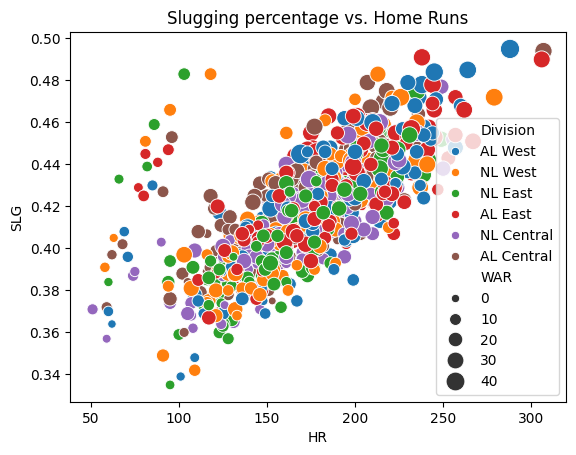

In [ ]:
plt = sns.scatterplot(data=data, x="HR", y="SLG", hue="Division", size="WAR", sizes=(20,200))
plt.set_title("Slugging percentage vs. Home Runs")
plt.set_xlabel("HR")
plt.set_ylabel("SLG")

# wRC and WinPct

wRC is weighted runs created plus (wRC+), an advanced stat measuring player performance for the team. It makes sense that, if the players on the team are performing well, then the team should win more games, suggesting a positive relationship between wRC and WinPct. Fit a linear relationship with wRC as the independent variable and WinPct as the dependent variable. Report the results of the regression, including the estimates of the coefficients, the standard errors of the coefficients and the p-values for the coefficients. Is there a significant relationship between the two variables? Plot the scatterplot between the two variables and verify that the line of best fit fits well. Look at the residuals and the residual plots to confirm the assumptions necessary to do linear regression.

In [ ]:
# regression
model1 = smf.ols(formula='WinPct ~ wRC', data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 WinPct   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     649.1
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          2.28e-105
Time:                        20:50:56   Log-Likelihood:                 1195.7
No. Observations:                 804   AIC:                            -2387.
Df Residuals:                     802   BIC:                            -2378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0345      0.021     -1.637      0.102      -0.076       0.007
wRC            0.0055      0.000     25.477      0.000       0.005       0.006
==============================================================================
Omnibus:                        3.144   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.156
Skew:                          -0.152   Prob(JB):                        0.206
Kurtosis:                       2.966   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

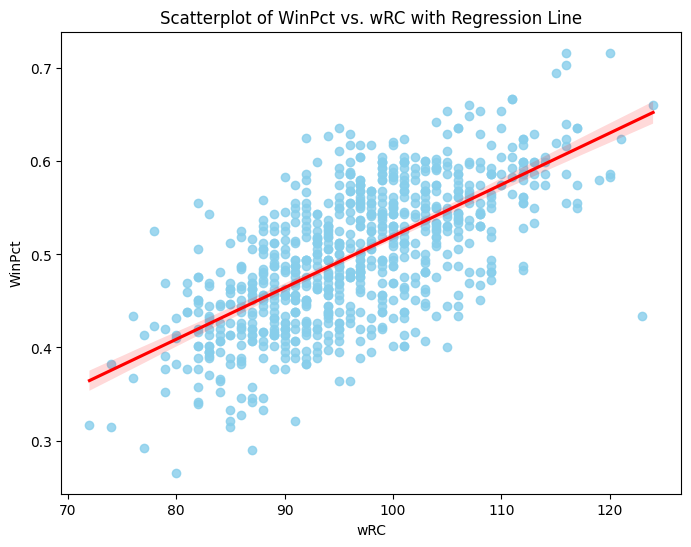

In [ ]:
# scatter plot with line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x='wRC', y='WinPct', data=data, line_kws={'color':'red'}, scatter_kws={'color':'skyblue'})
plt.title('Scatterplot of WinPct vs. wRC with Regression Line')
plt.xlabel('wRC')
plt.ylabel('WinPct')
plt.show()

In [ ]:
# calculating residuals
residuals1 = model1.resid

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

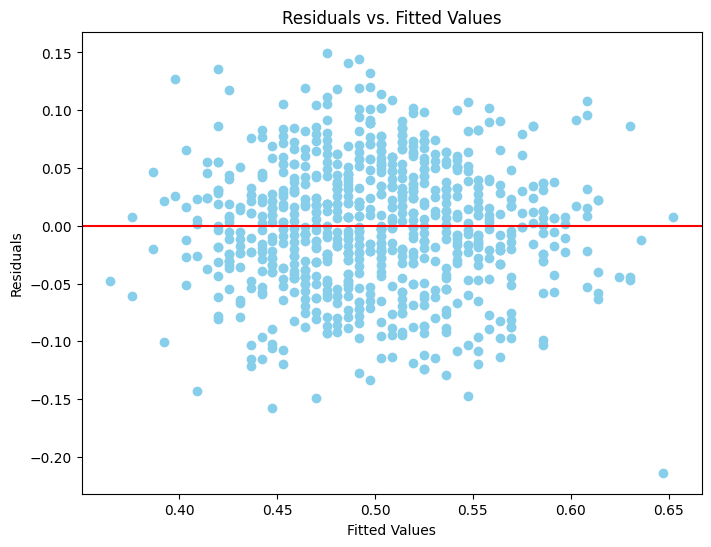

In [ ]:
# residuals fitted
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, residuals1, color='skyblue')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt

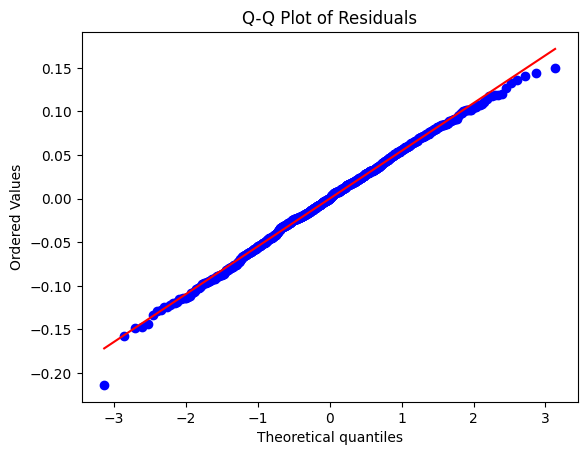

In [ ]:
# q-q plot of residuals
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

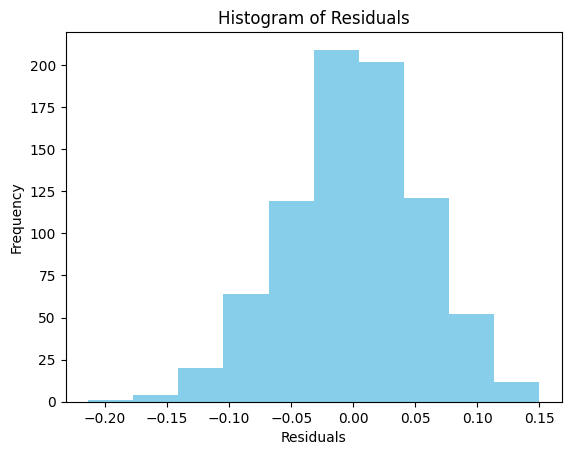

In [ ]:
plt.hist(residuals1, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# HRA and SO

HRA, home runs allowed, and SO, strikeouts thrown, are both measures of pitching success. The best pitchers tend to throw more strikeouts and give up less home runs. That would suggest a negative relationship between HRA and SO.
Fit a linear relationship with HRA as the independent variable and SO as the dependent variable. Report the results of the regression, including the estimates of the coefficients, the standard errors of the coeffi-
cients and the p-values for the coefficients. Is there a significant relationship between the two variables? Plot the scatterplot between the two variables and verify that the line of best fit fits well. Look at the
residuals and the residual plots to confirm the assumptions necessary to do linear regression.

In [ ]:
# regression
model2 = smf.ols(formula='SO ~ HRA', data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SO   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     243.8
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           3.49e-48
Time:                        20:50:58   Log-Likelihood:                -5307.8
No. Observations:                 804   AIC:                         1.062e+04
Df Residuals:                     802   BIC:                         1.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    636.5782     31.877     19.970      0.000     574.006     699.150
HRA            2.8717      0.184     15.613      0.000       2.511       3.233
==============================================================================
Omnibus:                        4.427   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.508
Skew:                           0.040   Prob(JB):                        0.173
Kurtosis:                       2.687   Cond. No.                         878.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'SO')

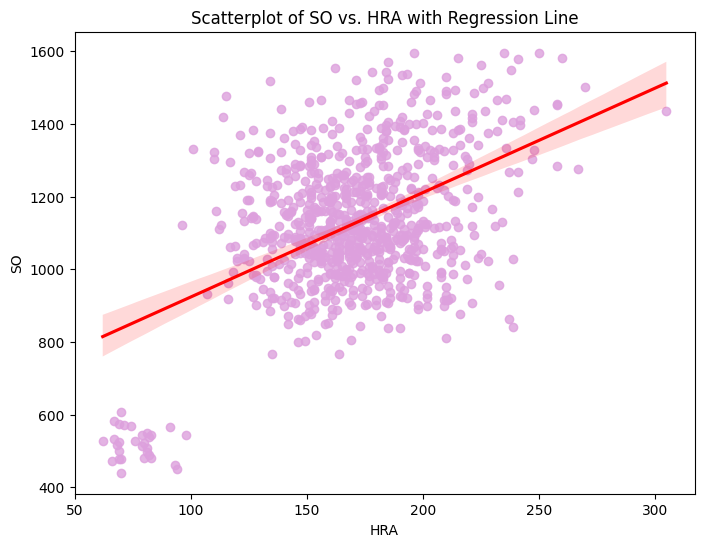

In [ ]:
# scatterplot with line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x='HRA', y='SO', data=data, line_kws={'color':'red'}, scatter_kws={'color': 'plum'})
plt.title('Scatterplot of SO vs. HRA with Regression Line')
plt.xlabel('HRA')
plt.ylabel('SO')

In [ ]:
# calculating residual
residuals2 = model2.resid

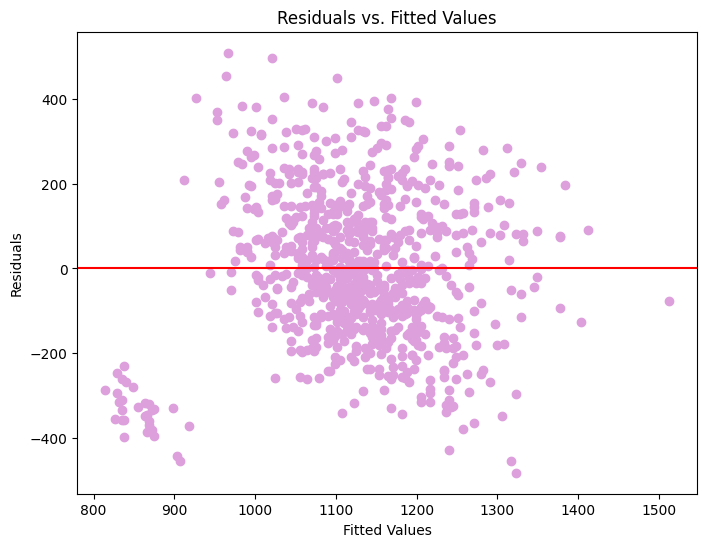

In [ ]:
# residuals and fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model2.fittedvalues, residuals2, color='plum')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

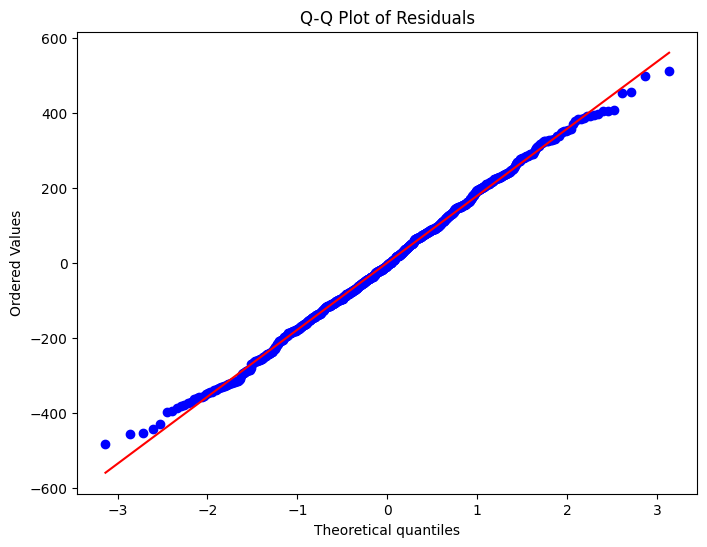

In [ ]:
# q-q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

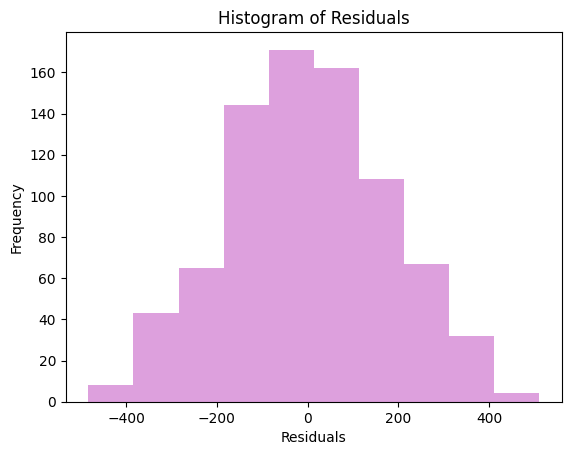

In [ ]:
plt.hist(residuals2, color='plum')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# ERA and OPS

ERA, earned run average, is a measure of pitching success, with better pitchers having low ERAs. OPS is a measure of hitting success, with better hitters having high OPSs. Does pitching success as a team correlate with hitting success?
Fit a linear relationship with OPS as the independent variable and ERA as the dependent variable. Report the results of the regression, including the estimates of the coefficients, the standard errors of the coeffi-
cients and the p-values for the coefficients. Is there a significant relationship between the two variables? Plot the scatterplot between the two variables and verify that the line of best fit fits well. Look at the
residuals and the residual plots to confirm the assumptions necessary to do linear regression.

In [ ]:
# regression
model3 = smf.ols(formula='ERA ~ OPS', data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERA   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     23.43
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.56e-06
Time:                        20:51:01   Log-Likelihood:                -659.85
No. Observations:                 804   AIC:                             1324.
Df Residuals:                     802   BIC:                             1333.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5450      0.364      6.994      0.000       1.831       3.259
OPS            2.3588      0.487      4.840      0.000       1.402       3.316
==============================================================================
Omnibus:                        9.086   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.763
Skew:                           0.221   Prob(JB):                       0.0125
Kurtosis:                       2.742   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# residual
residuals3 = model3.resid
residuals3

,0
0,0.087908
1,0.938673
2,0.177544
3,0.173491
4,0.556050
...,...
799,-0.509633
800,-0.281227
801,-0.152657
802,0.731032


Text(0, 0.5, 'ERA')

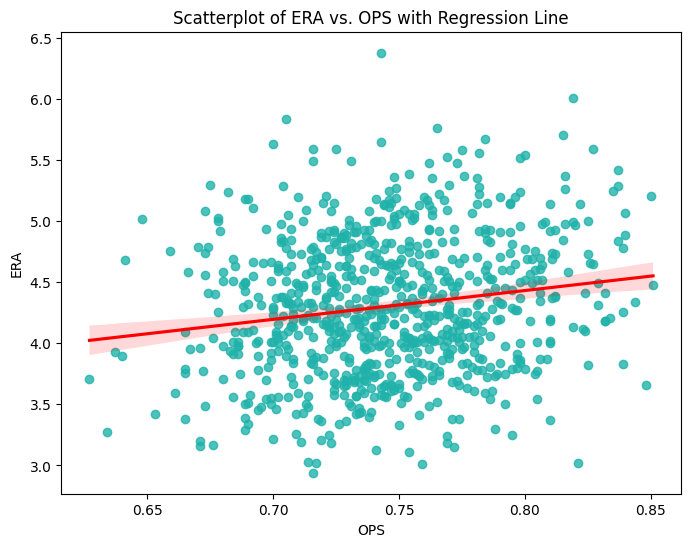

In [ ]:
# scatterplot with line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x='OPS', y='ERA', data=data, line_kws={'color':'red'}, scatter_kws={'color':'lightseagreen'})
plt.title('Scatterplot of ERA vs. OPS with Regression Line')
plt.xlabel('OPS')
plt.ylabel('ERA')

Text(0, 0.5, 'Residuals')

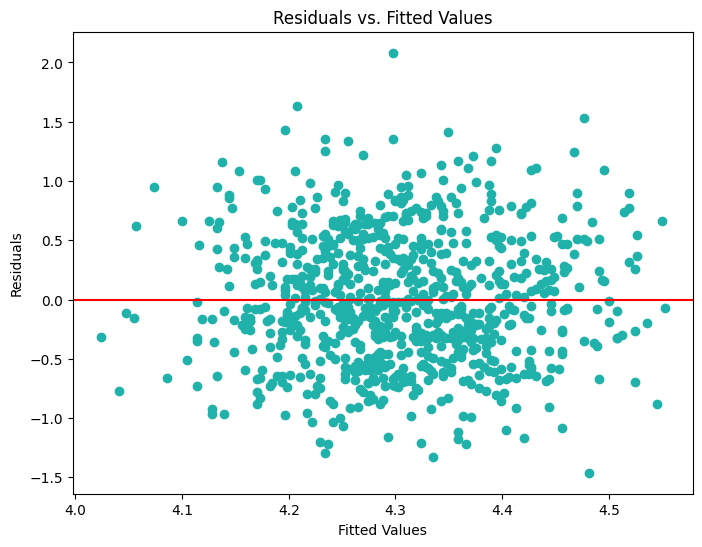

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(model3.fittedvalues, residuals3, color='lightseagreen')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

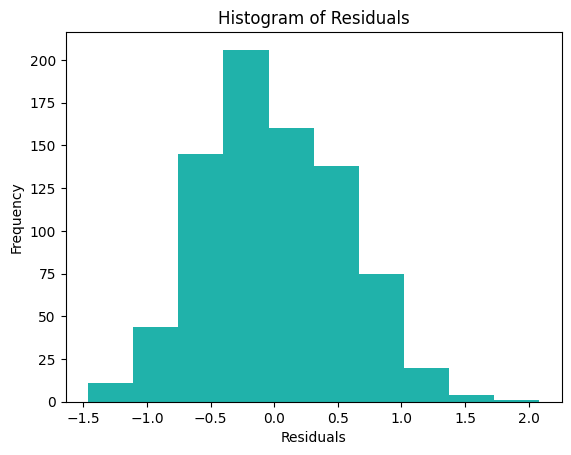

In [ ]:
plt.hist(residuals3, color='lightseagreen')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

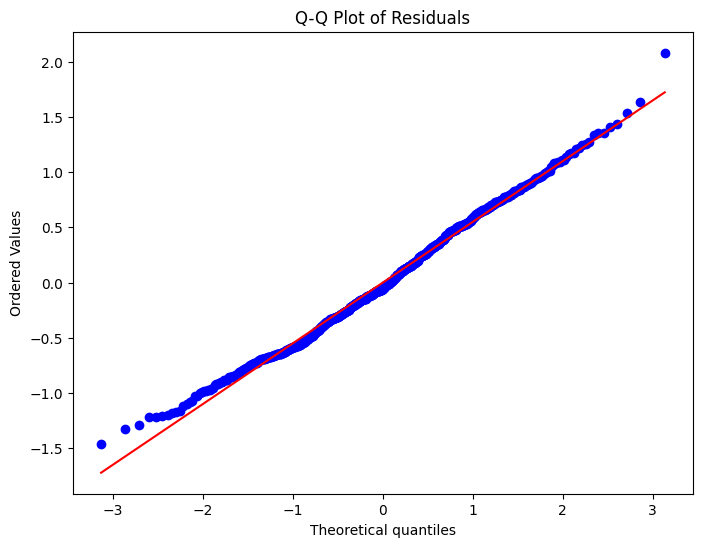

In [ ]:
# q-q plot of resids
plt.figure(figsize=(8, 6))
stats.probplot(residuals3, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()